In [68]:
import pandas as pd

data = pd.read_csv('/Users/ulrika/Desktop/Fall 2024/Practicum/Datasets/presidential_document_raw_text.csv')
data.head()

,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,not_received_for_publication,pdf_text
0,89 FR 80345,2024-22938,80350.0,https://www.federalregister.gov/documents/2024...,https://www.govinfo.gov/content/pkg/FR-2024-10...,Presidential Document,Executive Order,10/02/2024,2024-09-26,80345.0,Combating Emerging Firearms Threats and Improv...,NaN,14127,NaN,Presidential Documents80345 \nFederal Register...
1,89 FR 73559,2024-20712,73564.0,https://www.federalregister.gov/documents/2024...,https://www.govinfo.gov/content/pkg/FR-2024-09...,Presidential Document,Executive Order,09/11/2024,2024-09-06,73559.0,Investing in America and Investing in American...,"See: EO 11246, September 24, 1965; EO 13985, J...",14126,NaN,Presidential Documents73559 Federal Register /...
2,89 FR 60791,2024-16740,60792.0,https://www.federalregister.gov/documents/2024...,https://www.govinfo.gov/content/pkg/FR-2024-07...,Presidential Document,Executive Order,07/29/2024,2024-07-24,60791.0,Establishing an Emergency Board To Investigate...,NaN,14125,NaN,Presidential Documents60791 \nFederal Register...
3,89 FR 59585,2024-16225,59589.0,https://www.federalregister.gov/documents/2024...,https://www.govinfo.gov/content/pkg/FR-2024-07...,Presidential Document,Executive Order,07/22/2024,2024-07-17,59585.0,White House Initiative on Advancing Educationa...,"See: EO 14045, September 13, 2021",14124,NaN,Presidential Documents59585 \nFederal Register...
4,89 FR 51949,2024-13810,51953.0,https://www.federalregister.gov/documents/2024...,https://www.govinfo.gov/content/pkg/FR-2024-06...,Presidential Document,Executive Order,06/21/2024,2024-06-14,51949.0,White House Council on Supply Chain Resilience,"See: EO 14017, February 24, 2021\r\nSupersedes...",14123,NaN,Presidential Documents51949 \nFederal Register...


In [69]:
data.tail()

,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,not_received_for_publication,pdf_text
6626,NaN,,NaN,NaN,NaN,Presidential Document,Executive Order,NaN,1944-08-08,NaN,The Honorable A. Cecil Snyder Designated as Ac...,NaN,9461-A,True,Error scraping nan: 'float' object has no attr...
6627,NaN,,NaN,NaN,NaN,Presidential Document,Executive Order,NaN,1949-01-05,NaN,Korea,NaN,10026-A,True,Error scraping nan: 'float' object has no attr...
6628,NaN,,NaN,NaN,NaN,Presidential Document,Executive Order,NaN,1954-10-26,NaN,-A Assignment of Frequencies to Government Rad...,NaN,10571,True,Error scraping nan: 'float' object has no attr...
6629,NaN,,NaN,NaN,NaN,Presidential Document,Executive Order,NaN,1957-01-16,NaN,Radio Frequencies,"Amended by: EO 10995, February 16, 1962\nRevok...",10695-A,True,Error scraping nan: 'float' object has no attr...
6630,32 FR 10049,,NaN,NaN,NaN,Presidential Document,Executive Order,NaN,1992-12-18,NaN,Half-Day Closing of Executive Departments and ...,NaN,12825,NaN,Error scraping nan: 'float' object has no attr...


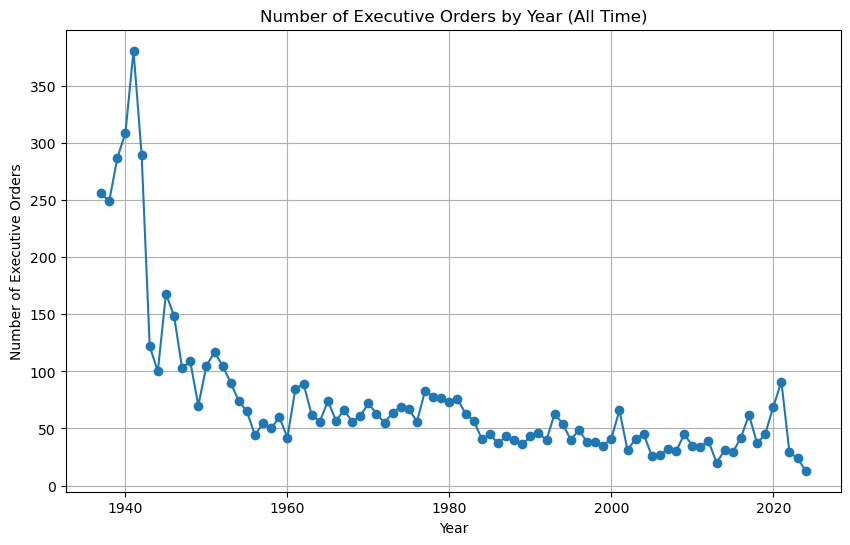

In [41]:
data['signing_date'] = pd.to_datetime(data['signing_date'], errors='coerce')
data['publication_date'] = pd.to_datetime(data['publication_date'], errors='coerce')

# 1. Temporal Trend Analysis: Number of Executive Orders by Year

# Extract the year from signing_date
data['year'] = data['signing_date'].dt.year

# Count the number of Executive Orders per year
yearly_counts = data.groupby('year').size()

# Plotting the trend of Executive Orders by Year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Executive Orders by Year (All Time)')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.grid(True)
plt.show()

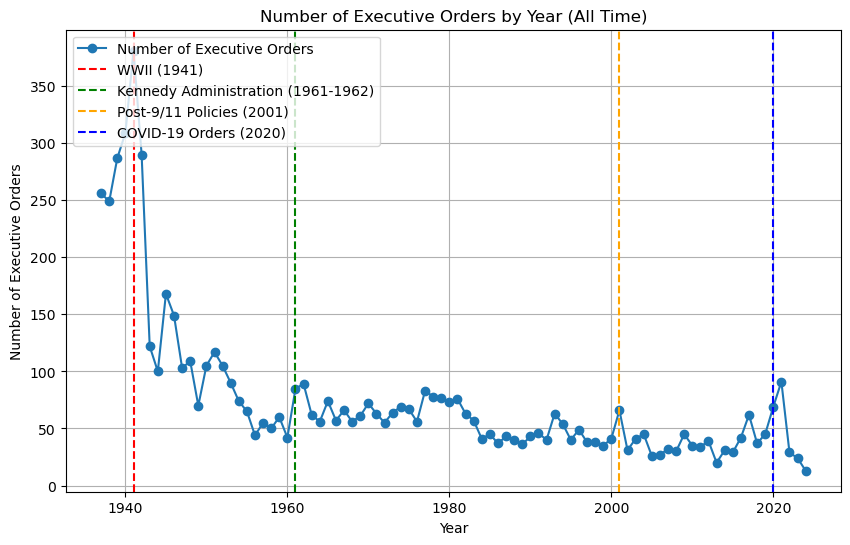

In [50]:
# Step 1: Convert dates to datetime if not already done
data['signing_date'] = pd.to_datetime(data['signing_date'], errors='coerce')

# Step 2: Extract year from signing_date
data['year'] = data['signing_date'].dt.year

# Step 3: Temporal Trend Analysis (All Time)

# Count the number of executive orders per year (All time)
yearly_counts = data.groupby('year').size()

# Plotting the trend of Executive Orders by Year with annotations
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label='Number of Executive Orders')

# Adding annotations for important historical events
plt.axvline(x=1941, color='red', linestyle='--', label='WWII (1941)')
plt.axvline(x=1961, color='green', linestyle='--', label='Kennedy Administration (1961-1962)')
plt.axvline(x=2001, color='orange', linestyle='--', label='Post-9/11 Policies (2001)')
plt.axvline(x=2020, color='blue', linestyle='--', label='COVID-19 Orders (2020)')

# Customize the plot
plt.title('Number of Executive Orders by Year (All Time)')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

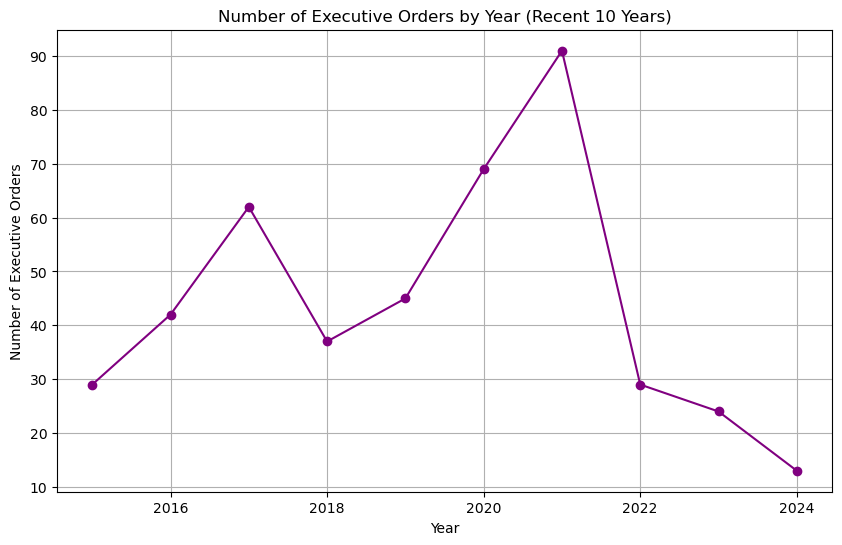

In [17]:
import matplotlib.pyplot as plt

# Get the current year
current_year = data['year'].max()

# Filter the data for the last 10 years
recent_10_years = data[data['year'] >= (current_year - 9)]  # Last 10 years including the current year

# Count the number of Executive Orders per year for the recent 10 years
yearly_counts_recent = recent_10_years.groupby('year').size()

# Plotting the trend of Executive Orders by Year for the recent 10 years
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts_recent.index, yearly_counts_recent.values, marker='o', color='purple')
plt.title('Number of Executive Orders by Year (Recent 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.grid(True)
plt.show()

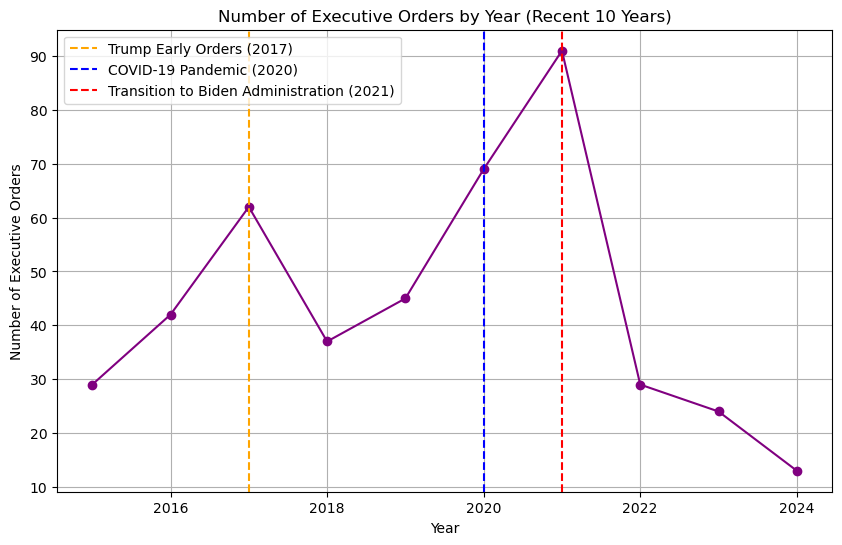

In [52]:
# Adding the annotation for the 2017 spike (Trump Administration) to the recent 10 years chart

import matplotlib.pyplot as plt

# Get the current year
current_year = data['year'].max()

# Filter the data for the last 10 years
recent_10_years = data[data['year'] >= (current_year - 9)]  # Last 10 years including the current year

# Count the number of Executive Orders per year for the recent 10 years
yearly_counts_recent = recent_10_years.groupby('year').size()

# Plotting the trend of Executive Orders by Year for the recent 10 years with annotations
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts_recent.index, yearly_counts_recent.values, marker='o', color='purple')

# Adding annotations for key events in the recent 10 years
plt.axvline(x=2017, color='orange', linestyle='--', label='Trump Early Orders (2017)')
plt.axvline(x=2020, color='blue', linestyle='--', label='COVID-19 Pandemic (2020)')
plt.axvline(x=2021, color='red', linestyle='--', label='Transition to Biden Administration (2021)')

# Customize the plot
plt.title('Number of Executive Orders by Year (Recent 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Executive Orders')
plt.legend(loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

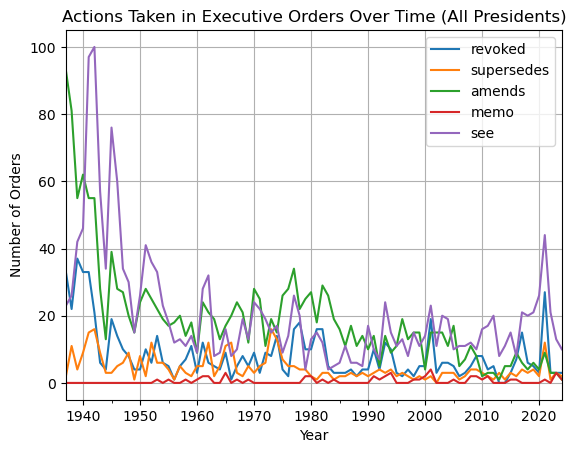

In [18]:
import matplotlib.pyplot as plt

# Step 1: Create columns based on keywords in 'disposition_notes'
data['revoked'] = data['disposition_notes'].str.contains('Revokes', case=False, na=False).astype(int)
data['supersedes'] = data['disposition_notes'].str.contains('Supersedes', case=False, na=False).astype(int)
data['amends'] = data['disposition_notes'].str.contains('Amends', case=False, na=False).astype(int)
data['memo'] = data['disposition_notes'].str.contains('Memo', case=False, na=False).astype(int)
data['see'] = data['disposition_notes'].str.contains('See', case=False, na=False).astype(int)

# Step 2: Plot the trends for all actions
plt.figure(figsize=(10, 6))

# Resample the data by year and sum the actions (Revokes, Supersedes, Amends, Memo, See)
data.set_index('signing_date').resample('Y')[['revoked', 'supersedes', 'amends', 'memo', 'see']].sum().plot()

# Customize the plot
plt.title("Actions Taken in Executive Orders Over Time (All Presidents)")
plt.ylabel("Number of Orders")
plt.xlabel("Year")
plt.grid(True)

# Display the plot
plt.show()

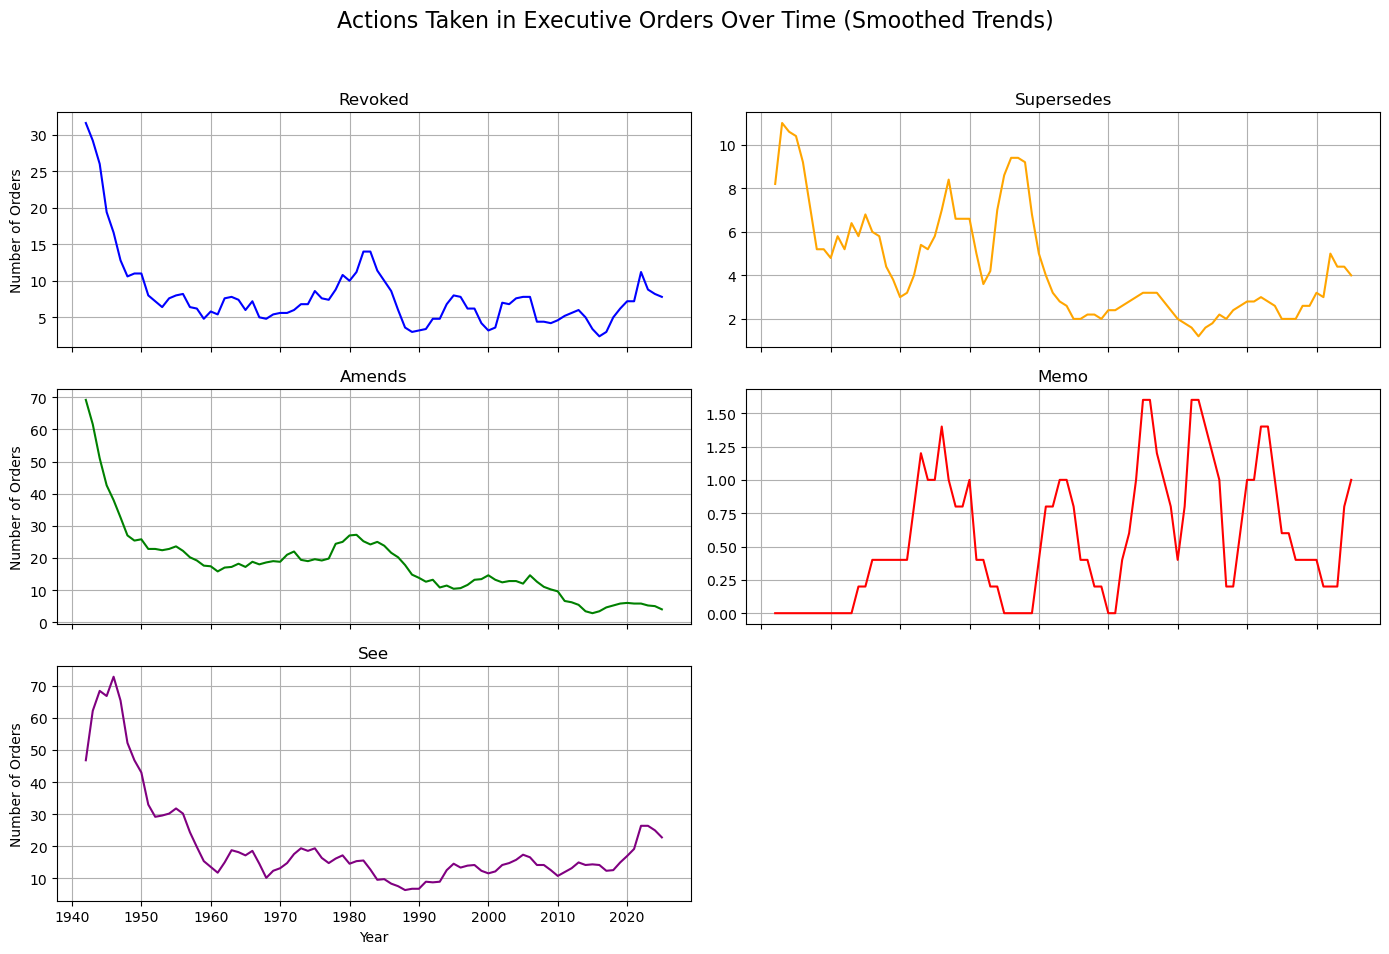

In [19]:
import matplotlib.pyplot as plt

# Apply a rolling average (window size of 5 years) to smooth out fluctuations
data_resampled = data.set_index('signing_date').resample('Y')[['revoked', 'supersedes', 'amends', 'memo', 'see']].sum()
data_smoothed = data_resampled.rolling(window=5).mean()

# Create subplots for each action
fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
fig.suptitle("Actions Taken in Executive Orders Over Time (Smoothed Trends)", fontsize=16)

# Plot each action on a separate subplot
axs[0, 0].plot(data_smoothed.index, data_smoothed['revoked'], label='Revoked', color='blue')
axs[0, 0].set_title('Revoked')
axs[0, 0].set_ylabel('Number of Orders')
axs[0, 0].grid(True)

axs[0, 1].plot(data_smoothed.index, data_smoothed['supersedes'], label='Supersedes', color='orange')
axs[0, 1].set_title('Supersedes')
axs[0, 1].grid(True)

axs[1, 0].plot(data_smoothed.index, data_smoothed['amends'], label='Amends', color='green')
axs[1, 0].set_title('Amends')
axs[1, 0].set_ylabel('Number of Orders')
axs[1, 0].grid(True)

axs[1, 1].plot(data_smoothed.index, data_smoothed['memo'], label='Memo', color='red')
axs[1, 1].set_title('Memo')
axs[1, 1].grid(True)

axs[2, 0].plot(data_smoothed.index, data_smoothed['see'], label='See', color='purple')
axs[2, 0].set_title('See')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Number of Orders')
axs[2, 0].grid(True)

# Remove the empty subplot
fig.delaxes(axs[2, 1])

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

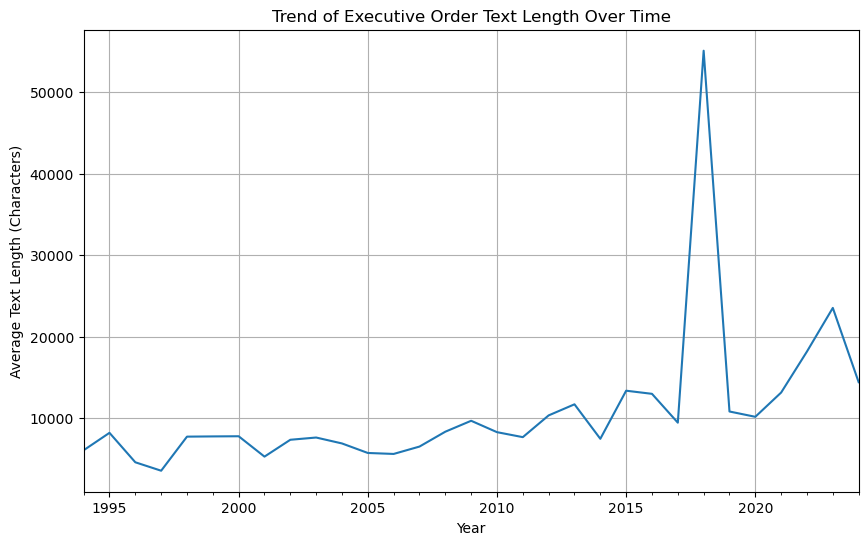

In [35]:
import matplotlib.pyplot as plt

# Step 1: Drop entries with text length of 0 (missing text)
data_cleaned = data[data['text_length'] > 59]

# Step 2: Resample by year and calculate the average text length
plt.figure(figsize=(10, 6))
data_cleaned.set_index('signing_date').resample('Y')['text_length'].mean().plot()

# Step 3: Customize the plot
plt.title("Trend of Executive Order Text Length Over Time")
plt.ylabel("Average Text Length (Characters)")
plt.xlabel("Year")
plt.grid(True)

# Display the plot
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Step 1: Vectorize the text using a bag-of-words model
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['pdf_text'].astype(str))  # Ensure all text is string format

# Step 2: Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed
lda_model.fit(X)

# Step 3: Extract the topics and their top words
def display_topics(model, feature_names, no_top_words):
    topic_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_words[topic_idx] = top_words
        print(f"Topic {topic_idx + 1}: {top_words}")
    return topic_words

# Get the top words for each topic
no_top_words = 10
topics = display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

# Step 4: Assign the most relevant topic to each document
topic_values = lda_model.transform(X)
data['topic_label'] = topic_values.argmax(axis=1)  # Assigning the dominant topic

# Optionally, map the topic labels to the top words for each topic for readability
data['topic_words'] = data['topic_label'].map(topics)

# Step 5: Verify the new topic labels and words in the dataset
data[['pdf_text', 'topic_label', 'topic_words']].head()

# You can now use this 'topic_label' column for further trend analysis as needed.


Topic 1: accused person shall military court martial judge authority rule evidence
Topic 2: 4790 presidential fr federal register vol po fm frm 00000
Topic 3: object error attribute scraping split nan float afv afvs rcra
Topic 4: order united states section secretary person sec executive act national
Topic 5: shall order federal agency agencies executive president law secretary section


,pdf_text,topic_label,topic_words
0,Presidential Documents80345 \nFederal Register...,4,shall order federal agency agencies executive ...
1,Presidential Documents73559 Federal Register /...,4,shall order federal agency agencies executive ...
2,Presidential Documents60791 \nFederal Register...,1,4790 presidential fr federal register vol po f...
3,Presidential Documents59585 \nFederal Register...,4,shall order federal agency agencies executive ...
4,Presidential Documents51949 \nFederal Register...,4,shall order federal agency agencies executive ...


In [16]:
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

Topic 1: accused person shall military court martial judge authority rule evidence
Topic 2: 4790 presidential fr federal register vol po fm frm 00000
Topic 3: object error attribute scraping split nan float afv afvs rcra
Topic 4: order united states section secretary person sec executive act national
Topic 5: shall order federal agency agencies executive president law secretary section


{0: 'accused person shall military court martial judge authority rule evidence',
 1: '4790 presidential fr federal register vol po fm frm 00000',
 2: 'object error attribute scraping split nan float afv afvs rcra',
 3: 'order united states section secretary person sec executive act national',
 4: 'shall order federal agency agencies executive president law secretary section'}

In [9]:
# 4. Disposition Notes: Superseded, Revoked, etc.

# Checking for specific keywords in the disposition notes (e.g., Supersedes, Revoked)
keywords = ['Supersedes', 'Revoked']
data['disposition_supersedes'] = data['disposition_notes'].str.contains('Supersedes', case=False, na=False)
data['disposition_revoked'] = data['disposition_notes'].str.contains('Revoked', case=False, na=False)

# Count the number of times 'Supersedes' and 'Revoked' are mentioned in disposition notes
supersedes_count = data['disposition_supersedes'].sum()
revoked_count = data['disposition_revoked'].sum()

# Display the results
supersedes_count, revoked_count

(389, 1723)